# Data Diri

**Nama:** Kartika Adhi Ning Wulan Satunggal  
**Email:** kartikaadhiningwulan@mail.ugm.ac.id
**Universitas:** Universitas Gadjah Mada  
**Program:** Student Development Initiative (SDI) 2025  
**Topik Capstone:** Analisis Aspirasi Generasi Muda melalui Fenomena #KaburAjaDulu  


In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.7 MB/s eta 0:00:00


## Import Library & Load Dataset

In [ ]:
from google.colab import files
import pandas as pd
import re
from langchain_community.llms import Replicate
from google.colab import userdata
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [2]:
uploaded = files.upload()  # Pilih: kaburajadulu_dataset_sample.csv
df = pd.read_csv("kaburajadulu_dataset_sample.csv")
df.head()


Saving kaburajadulu_dataset_sample.csv to kaburajadulu_dataset_sample.csv


,source,text,date
0,reddit,"Gaji kecil, biaya hidup tinggi. Kayaknya masa ...",2025-06-01
1,reddit,Pendidikan di sini mahal dan gak semua daerah ...,2025-06-02
2,reddit,"Lingkungan kerja di Indonesia toxic banget, se...",2025-06-03
3,reddit,Ingin punya karier yang berkembang tanpa konek...,2025-06-04
4,reddit,"Bukan benci negara sendiri, cuma pengen hidup ...",2025-06-05


## Preprocessing Opini Publik

In [3]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s#]", "", text)
    return text.lower()

df["clean_text"] = df["text"].apply(clean_text)
df.head()


,source,text,date,clean_text
0,reddit,"Gaji kecil, biaya hidup tinggi. Kayaknya masa ...",2025-06-01,gaji kecil biaya hidup tinggi kayaknya masa de...
1,reddit,Pendidikan di sini mahal dan gak semua daerah ...,2025-06-02,pendidikan di sini mahal dan gak semua daerah ...
2,reddit,"Lingkungan kerja di Indonesia toxic banget, se...",2025-06-03,lingkungan kerja di indonesia toxic banget sen...
3,reddit,Ingin punya karier yang berkembang tanpa konek...,2025-06-04,ingin punya karier yang berkembang tanpa konek...
4,reddit,"Bukan benci negara sendiri, cuma pengen hidup ...",2025-06-05,bukan benci negara sendiri cuma pengen hidup y...


In [4]:
# Ambil 5 opini publik acak
sample_texts = "\n".join(df["clean_text"].sample(5, random_state=42).tolist())

# Buat prompt untuk Granite
prompt_text = f"""
Berikut adalah opini anak muda Indonesia terkait #KaburAjaDulu:

{sample_texts}

Tolong:
- Ringkas aspirasi utama mereka
- Klasifikasikan dalam kategori (ekonomi, pendidikan, sosial, budaya, dll)
- Berikan 2 rekomendasi nyata untuk pemerintah atau institusi terkait
"""
print(prompt_text)



Berikut adalah opini anak muda Indonesia terkait #KaburAjaDulu:

pendidikan di sini mahal dan gak semua daerah punya akses internet capek #kaburajadulu
bukan benci negara sendiri cuma pengen hidup yang lebih manusiawi #kaburajadulu
lingkungan kerja di indonesia toxic banget senioritas berlebihan pindah ke negara yang lebih adil #kaburajadulu
gaji kecil biaya hidup tinggi kayaknya masa depan lebih cerah di luar negeri #kaburajadulu
ingin punya karier yang berkembang tanpa koneksi dan nepotisme di sini susah #kaburajadulu

Tolong:
- Ringkas aspirasi utama mereka
- Klasifikasikan dalam kategori (ekonomi, pendidikan, sosial, budaya, dll)
- Berikan 2 rekomendasi nyata untuk pemerintah atau institusi terkait



In [5]:
# Ambil token dari colab
api_token = userdata.get("api_token")

# Masukin token ke env variable
os.environ["REPLICATE_API_TOKEN"] = api_token

In [6]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

# Define LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters
)

## Prompt & Analisis dengan IBM Granite

In [7]:
# Kirim prompt ke LLM
output = llm(prompt_text)
print("=== Hasil dari IBM Granite ===\n")
print(output)

# Tambahkan ini untuk bersihkan Markdown (**...**)
import re
output_clean = re.sub(r"\*\*(.*?)\*\*", r"\1", output)
print("\n=== Output Bersih Tanpa Markdown ===\n")
print(output_clean)

/tmp/ipython-input-7-3712802210.py:2: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  output = llm(prompt_text)


=== Hasil dari IBM Granite ===

**Ringkasan Aspirasi Utama:**

1. **Ekonomi:** Mereka ingin pendapatan yang lebih baik dan harga barang yang lebih terjangkau, serta kesempatan kerja yang adil tanpa nepotisme.
2. **Pendidikan:** Mereka ingin pendidikan yang lebih murah dan aksesiblity internet yang lebih luas, terutama di daerah-daerah luar daerah utama.
3. **Sosial:** Mereka ingin lingkungan kerja yang lebih manusiawi dan tidak toksin, serta kesejahteraan yang lebih baik tanpa harus berpindah ke negara lain.

**Klasifikasi Aspirasi:**

- Ekonomi: 2 aspirasi
- Pendidikan: 1 aspirasi
- Sosial: 2 aspirasi

**Rekomendasi untuk Pemerintah/Institusi:**

1. **Pendidikan:**
   - **Inisiatif 1:** Memperluas akses internet di daerah-daerah luar daerah utama dengan membuat infrastruktur dan program penyediaan akses internet yang lebih luas.
   - **Inisiatif 2:** Memperbaiki sistem biaya pendidikan dengan menyediakan bantuan finansial atau beasiswa bagi keluarga miskin, serta mengembangkan program

## Visualisasi Kata dan Kategori

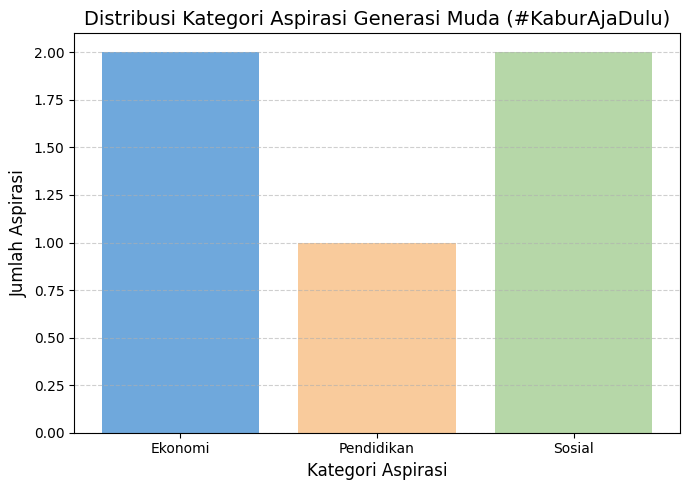

In [71]:
import matplotlib.pyplot as plt

# Data klasifikasi hasil output IBM Granite
categories = ['Ekonomi', 'Pendidikan', 'Sosial']
counts = [2, 1, 2]  # Sesuaikan ini dengan jumlah aspirasi dari output

# Warna custom
colors = ['#6fa8dc', '#f9cb9c', '#b6d7a8']

# Buat bar chart
plt.figure(figsize=(7, 5))
plt.bar(categories, counts, color=colors)

# Judul dan label
plt.title("Distribusi Kategori Aspirasi Generasi Muda (#KaburAjaDulu)", fontsize=14)
plt.xlabel("Kategori Aspirasi", fontsize=12)
plt.ylabel("Jumlah Aspirasi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tampilkan
plt.tight_layout()
plt.show()

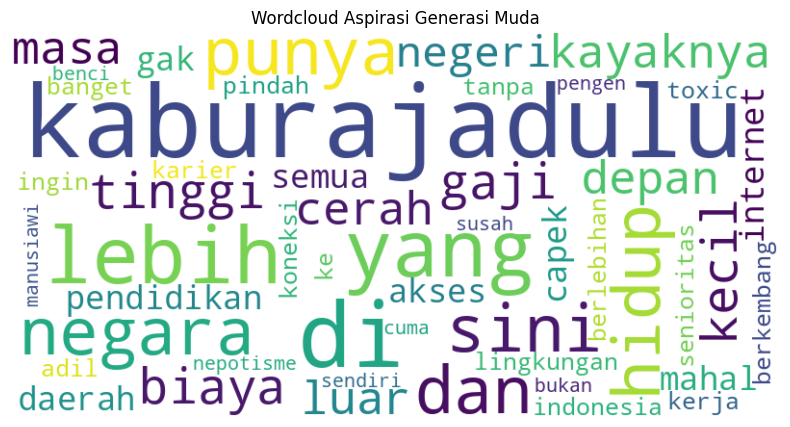

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["clean_text"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud Aspirasi Generasi Muda")
plt.show()

In [73]:
from collections import Counter
import re

# Gabungkan semua opini publik dari df["clean_text"]
text_all = " ".join(df["clean_text"])
clean_text = re.sub(r"[^a-zA-Z\s]", "", text_all).lower()
words = clean_text.split()

# Hitung frekuensi kata
word_freq = Counter(words)

# Top 100 kata
top_words = word_freq.most_common(100)

# Kamus kata positif (harapan) & negatif (kekecewaan) sederhana
positif_keywords = ["harap", "ingin", "impian", "maju", "layak", "baik", "masa depan", "sejahtera", "kemajuan"]
negatif_keywords = ["tidak", "susah", "kabur", "mahal", "buruk", "keluar", "nepotisme", "korupsi", "lelah", "toksik"]

# Pisahkan otomatis
harapan = [(w, c) for w, c in top_words if any(p in w for p in positif_keywords)]
kekecewaan = [(w, c) for w, c in top_words if any(n in w for n in negatif_keywords)]

# Ambil top 5 dari masing-masing
top5_harapan = harapan[:5]
top5_kekecewaan = kekecewaan[:5]

# Tampilkan hasil
print("🌱 Top 5 Kata Harapan (Otomatis):")
for w, c in top5_harapan:
    print(f"{w}: {c}")

print("\n⚠️ Top 5 Kata Kekecewaan (Otomatis):")
for w, c in top5_kekecewaan:
    print(f"{w}: {c}")


🌱 Top 5 Kata Harapan (Otomatis):
ingin: 1

⚠️ Top 5 Kata Kekecewaan (Otomatis):
kaburajadulu: 5
mahal: 1
nepotisme: 1
susah: 1


# Perbandingan Manual vs LLM

## Ambil 3-5 opini dari dataset

In [64]:
# Ambil 3 opini dari dataset
sample_opini = df["clean_text"].sample(3, random_state=42).tolist()

for i, o in enumerate(sample_opini, 1):
    print(f"{i}. {o}")


1. pendidikan di sini mahal dan gak semua daerah punya akses internet capek #kaburajadulu
2. bukan benci negara sendiri cuma pengen hidup yang lebih manusiawi #kaburajadulu
3. lingkungan kerja di indonesia toxic banget senioritas berlebihan pindah ke negara yang lebih adil #kaburajadulu


## Simpan hasil Granite untuk semua opini

In [65]:
llm_results = []

for opini in sample_opini:
    prompt = f"Klasifikasikan kalimat berikut ke dalam kategori: Ekonomi, Sosial, Pendidikan, atau Budaya.\n\nKalimat:\n\"{opini}\""
    kategori = llm.invoke(prompt)
    llm_results.append((opini, kategori.strip()))

# Tampilkan hasil klasifikasi dari AI
for i, (opini, kategori) in enumerate(llm_results, 1):
    print(f"{i}. Opini: {opini}\n   LLM Kategori: {kategori}\n")


1. Opini: pendidikan di sini mahal dan gak semua daerah punya akses internet capek #kaburajadulu
   LLM Kategori: Kalimat tersebut dapat dikategorikan sebagai: Pendidikan.

Penjelasan:
Kalimat "pendidikan di sini mahal dan gak semua daerah punya akses internet capek #kaburajadulu" membahas masalah yang terkait dengan biaya pendidikan dan akses internet, yang merupakan aspek penting dalam sistem pendidikan. Kata-kata sepertu "pendidikan", "mahal", dan "akses internet" menunjukkan bahwa konten kalimat berfokus pada isu-isu yang terkait dengan pendidikan, terutama keterbatasan akses dan biaya yang tinggi. Kata "#kaburajadulu" mungkin merupakan tag sosial media yang digunakan untuk menyampaikan pesan ini lebih luas, tetapi isi kalimat sendiri terkait dengan pendidikan.

2. Opini: bukan benci negara sendiri cuma pengen hidup yang lebih manusiawi #kaburajadulu
   LLM Kategori: Kalimat tersebut dapat di klasifikasikan ke dalam kategori Sosial.

Pada kalimat tersebut, pengguna menyampaikan ras

## Masukkan Kategori Manual (oleh saya sendiri)

In [67]:
# kategori yang saya inputkan sendiri menurut saya
manual_kategori = [
    "Pendidikan",
    "Ekonomi",
    "Sosial"
]

# Gabungkan ke tabel
print("📊 Perbandingan Manual vs LLM\n")
print("| Opini Publik | Manual Kategori | LLM Kategori |")
print("|--------------|------------------|---------------|")
for (opini, llm_kat), manual_kat in zip(llm_results, manual_kategori):
    print(f"| {opini} | {manual_kat} | {llm_kat} |")


📊 Perbandingan Manual vs LLM

| Opini Publik | Manual Kategori | LLM Kategori |
|--------------|------------------|---------------|
| pendidikan di sini mahal dan gak semua daerah punya akses internet capek #kaburajadulu | Pendidikan | Kalimat tersebut dapat dikategorikan sebagai: Pendidikan.

Penjelasan:
Kalimat "pendidikan di sini mahal dan gak semua daerah punya akses internet capek #kaburajadulu" membahas masalah yang terkait dengan biaya pendidikan dan akses internet, yang merupakan aspek penting dalam sistem pendidikan. Kata-kata sepertu "pendidikan", "mahal", dan "akses internet" menunjukkan bahwa konten kalimat berfokus pada isu-isu yang terkait dengan pendidikan, terutama keterbatasan akses dan biaya yang tinggi. Kata "#kaburajadulu" mungkin merupakan tag sosial media yang digunakan untuk menyampaikan pesan ini lebih luas, tetapi isi kalimat sendiri terkait dengan pendidikan. |
| bukan benci negara sendiri cuma pengen hidup yang lebih manusiawi #kaburajadulu | Ekonomi | Kalima